In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("./data/ATP.csv")
data

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.520876,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.216290,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264203,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.861739,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169685,3,NaN,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,...,22.740000,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169686,3,NaN,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,...,20.180000,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN
169687,3,NaN,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,...,28.780000,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0
169688,3,NaN,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,...,22.740000,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169690 entries, 0 to 169689
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   best_of             169690 non-null  int64  
 1   draw_size           1232 non-null    float64
 2   l_1stIn             83415 non-null   float64
 3   l_1stWon            83415 non-null   float64
 4   l_2ndWon            83415 non-null   float64
 5   l_SvGms             83415 non-null   float64
 6   l_ace               83415 non-null   float64
 7   l_bpFaced           83415 non-null   float64
 8   l_bpSaved           83415 non-null   float64
 9   l_df                83415 non-null   float64
 10  l_svpt              83415 non-null   float64
 11  loser_age           164700 non-null  float64
 12  loser_entry         25339 non-null   object 
 13  loser_hand          169605 non-null  object 
 14  loser_ht            139052 non-null  float64
 15  loser_id            169690 non-nul

In [4]:
data_filtered = data.drop(columns=["draw_size","loser_name","winner_name","loser_entry","winner_entry","loser_seed","winner_seed", "match_num", "minutes", "round", "score", "surface", "tourney_date","tourney_name"]).dropna()
data_filtered.head()

,best_of,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,...,w_bpSaved,w_df,w_svpt,winner_age,winner_hand,winner_ht,winner_id,winner_ioc,winner_rank,winner_rank_points
76863,3,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,...,5.0,0.0,53.0,25.61,R,180.0,101142,ESP,9.0,1487.0
76864,3,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,...,1.0,1.0,56.0,21.55,R,180.0,101613,USA,94.0,371.0
76865,3,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,...,2.0,4.0,80.0,25.32,R,185.0,101179,FRA,77.0,468.0
76866,3,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,...,6.0,1.0,82.0,25.83,R,180.0,101117,GER,65.0,502.0
76867,3,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,...,2.0,4.0,65.0,19.71,R,185.0,101901,USA,190.0,142.0


In [5]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_of             75881 non-null  int64  
 1   l_1stIn             75881 non-null  float64
 2   l_1stWon            75881 non-null  float64
 3   l_2ndWon            75881 non-null  float64
 4   l_SvGms             75881 non-null  float64
 5   l_ace               75881 non-null  float64
 6   l_bpFaced           75881 non-null  float64
 7   l_bpSaved           75881 non-null  float64
 8   l_df                75881 non-null  float64
 9   l_svpt              75881 non-null  float64
 10  loser_age           75881 non-null  float64
 11  loser_hand          75881 non-null  object 
 12  loser_ht            75881 non-null  float64
 13  loser_id            75881 non-null  int64  
 14  loser_ioc           75881 non-null  object 
 15  loser_rank          75881 non-null  float64
 16 

In [6]:
dict_hand = {k:i for i,k in enumerate(np.unique(pd.concat([data_filtered["loser_hand"],data_filtered["winner_hand"]],axis=0)))}
dict_ioc = {k:i for i,k in enumerate(np.unique(pd.concat([data_filtered["loser_ioc"],data_filtered["winner_ioc"]],axis=0)))}
dict_tourney_id = {k:i for i,k in enumerate(np.unique(data_filtered["tourney_id"]))}
dict_tourney_level = {k:i for i,k in enumerate(np.unique(data_filtered["tourney_level"]))}

In [7]:
dict_tourney_level

{'A': 0, 'D': 1, 'F': 2, 'G': 3, 'M': 4}

In [8]:
data_filtered["winner_hand"] = data_filtered["winner_hand"].apply(lambda x: dict_hand[x])
data_filtered["loser_hand"] = data_filtered["loser_hand"].apply(lambda x: dict_hand[x])
data_filtered["winner_ioc"] = data_filtered["winner_ioc"].apply(lambda x: dict_ioc[x])
data_filtered["loser_ioc"] = data_filtered["loser_ioc"].apply(lambda x: dict_ioc[x])
data_filtered["tourney_id"] = data_filtered["tourney_id"].apply(lambda x: dict_tourney_id[x])
data_filtered["tourney_level"] = data_filtered["tourney_level"].apply(lambda x: dict_tourney_level[x])

In [9]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_of             75881 non-null  int64  
 1   l_1stIn             75881 non-null  float64
 2   l_1stWon            75881 non-null  float64
 3   l_2ndWon            75881 non-null  float64
 4   l_SvGms             75881 non-null  float64
 5   l_ace               75881 non-null  float64
 6   l_bpFaced           75881 non-null  float64
 7   l_bpSaved           75881 non-null  float64
 8   l_df                75881 non-null  float64
 9   l_svpt              75881 non-null  float64
 10  loser_age           75881 non-null  float64
 11  loser_hand          75881 non-null  int64  
 12  loser_ht            75881 non-null  float64
 13  loser_id            75881 non-null  int64  
 14  loser_ioc           75881 non-null  int64  
 15  loser_rank          75881 non-null  float64
 16 

In [10]:
data_filtered.columns = ['best_of', 'first_1stIn', 'first_1stWon', 'first_2ndWon', 'first_SvGms', 'first_ace',
       'first_bpFaced', 'first_bpSaved', 'first_df', 'first_svpt', 'first_age', 'first_hand',
       'first_ht', 'first_id', 'first_ioc', 'first_rank', 'first_rank_points',
       'tourney_id', 'tourney_level', 'second_1stIn', 'second_1stWon',
       'second_2ndWon', 'second_SvGms', 'second_ace', 'second_bpFaced', 'second_bpSaved', 'second_df',
       'second_svpt', 'second_age', 'second_hand', 'second_ht', 'second_id',
       'second_ioc', 'second_rank', 'second_rank_points']
data_filtered["class"]=1
data_filtered.head()

,best_of,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,3,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,...,0.0,53.0,25.61,1,180.0,101142,24,9.0,1487.0,1
76864,3,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,...,1.0,56.0,21.55,1,180.0,101613,78,94.0,371.0,1
76865,3,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,...,4.0,80.0,25.32,1,185.0,101179,27,77.0,468.0,1
76866,3,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,...,1.0,82.0,25.83,1,180.0,101117,30,65.0,502.0,1
76867,3,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,...,4.0,65.0,19.71,1,185.0,101901,78,190.0,142.0,1


In [11]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_of             75881 non-null  int64  
 1   first_1stIn         75881 non-null  float64
 2   first_1stWon        75881 non-null  float64
 3   first_2ndWon        75881 non-null  float64
 4   first_SvGms         75881 non-null  float64
 5   first_ace           75881 non-null  float64
 6   first_bpFaced       75881 non-null  float64
 7   first_bpSaved       75881 non-null  float64
 8   first_df            75881 non-null  float64
 9   first_svpt          75881 non-null  float64
 10  first_age           75881 non-null  float64
 11  first_hand          75881 non-null  int64  
 12  first_ht            75881 non-null  float64
 13  first_id            75881 non-null  int64  
 14  first_ioc           75881 non-null  int64  
 15  first_rank          75881 non-null  float64
 16 

In [12]:
data_filtered_switched = data_filtered.copy(deep=True)
cols = data_filtered_switched.columns.tolist()
cols

['best_of',
 'first_1stIn',
 'first_1stWon',
 'first_2ndWon',
 'first_SvGms',
 'first_ace',
 'first_bpFaced',
 'first_bpSaved',
 'first_df',
 'first_svpt',
 'first_age',
 'first_hand',
 'first_ht',
 'first_id',
 'first_ioc',
 'first_rank',
 'first_rank_points',
 'tourney_id',
 'tourney_level',
 'second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points',
 'class']

In [13]:
cols[19:35]

['second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points']

In [14]:
cols_switched = [cols[0]] + cols[19:35] + cols[17:19] + cols[1:17]
cols_switched

['best_of',
 'second_1stIn',
 'second_1stWon',
 'second_2ndWon',
 'second_SvGms',
 'second_ace',
 'second_bpFaced',
 'second_bpSaved',
 'second_df',
 'second_svpt',
 'second_age',
 'second_hand',
 'second_ht',
 'second_id',
 'second_ioc',
 'second_rank',
 'second_rank_points',
 'tourney_id',
 'tourney_level',
 'first_1stIn',
 'first_1stWon',
 'first_2ndWon',
 'first_SvGms',
 'first_ace',
 'first_bpFaced',
 'first_bpSaved',
 'first_df',
 'first_svpt',
 'first_age',
 'first_hand',
 'first_ht',
 'first_id',
 'first_ioc',
 'first_rank',
 'first_rank_points']

In [15]:
data_filtered_switched = data_filtered_switched[cols_switched]
data_filtered_switched

,best_of,second_1stIn,second_1stWon,second_2ndWon,second_SvGms,second_ace,second_bpFaced,second_bpSaved,second_df,second_svpt,...,first_bpSaved,first_df,first_svpt,first_age,first_hand,first_ht,first_id,first_ioc,first_rank,first_rank_points
76863,3,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,...,2.0,0.0,46.0,20.64,1,175.0,101746,39,78.0,459.0
76864,3,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,...,7.0,7.0,56.0,31.82,1,188.0,100587,55,220.0,114.0
76865,3,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,...,4.0,3.0,68.0,21.70,1,185.0,101601,55,212.0,116.0
76866,3,55.0,35.0,14.0,13.0,0.0,10.0,6.0,1.0,82.0,...,8.0,2.0,96.0,23.85,0,173.0,101332,38,72.0,483.0
76867,3,46.0,34.0,12.0,10.0,4.0,2.0,2.0,4.0,65.0,...,4.0,3.0,49.0,20.70,1,196.0,101735,3,28.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169648,3,55.0,43.0,15.0,14.0,10.0,3.0,2.0,2.0,78.0,...,2.0,4.0,70.0,35.28,0,188.0,104269,24,32.0,1200.0
169650,3,52.0,42.0,21.0,15.0,19.0,5.0,4.0,1.0,86.0,...,5.0,3.0,100.0,30.87,1,183.0,105138,24,18.0,1955.0
169652,3,30.0,21.0,14.0,9.0,3.0,1.0,0.0,0.0,51.0,...,5.0,2.0,61.0,26.52,1,180.0,106045,78,68.0,770.0
169653,3,37.0,28.0,9.0,9.0,6.0,7.0,6.0,2.0,56.0,...,2.0,0.0,44.0,33.69,1,183.0,104571,18,128.0,450.0


In [16]:
data_filtered_switched.columns = ['best_of', 'first_1stIn', 'first_1stWon', 'first_2ndWon', 'first_SvGms', 'first_ace',
       'first_bpFaced', 'first_bpSaved', 'first_df', 'first_svpt', 'first_age', 'first_hand',
       'first_ht', 'first_id', 'first_ioc', 'first_rank', 'first_rank_points',
       'tourney_id', 'tourney_level', 'second_1stIn', 'second_1stWon',
       'second_2ndWon', 'second_SvGms', 'second_ace', 'second_bpFaced', 'second_bpSaved', 'second_df',
       'second_svpt', 'second_age', 'second_hand', 'second_ht', 'second_id',
       'second_ioc', 'second_rank', 'second_rank_points']
data_filtered_switched["class"]=0
data_filtered_switched.head()

,best_of,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,3,37.0,30.0,7.0,9.0,1.0,6.0,5.0,0.0,53.0,...,0.0,46.0,20.64,1,175.0,101746,39,78.0,459.0,0
76864,3,25.0,17.0,20.0,9.0,5.0,2.0,1.0,1.0,56.0,...,7.0,56.0,31.82,1,188.0,100587,55,220.0,114.0,0
76865,3,55.0,35.0,16.0,12.0,2.0,4.0,2.0,4.0,80.0,...,3.0,68.0,21.70,1,185.0,101601,55,212.0,116.0,0
76866,3,55.0,35.0,14.0,13.0,0.0,10.0,6.0,1.0,82.0,...,2.0,96.0,23.85,0,173.0,101332,38,72.0,483.0,0
76867,3,46.0,34.0,12.0,10.0,4.0,2.0,2.0,4.0,65.0,...,3.0,49.0,20.70,1,196.0,101735,3,28.0,876.0,0


In [17]:
data_filtered_switched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75881 entries, 76863 to 169658
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   best_of             75881 non-null  int64  
 1   first_1stIn         75881 non-null  float64
 2   first_1stWon        75881 non-null  float64
 3   first_2ndWon        75881 non-null  float64
 4   first_SvGms         75881 non-null  float64
 5   first_ace           75881 non-null  float64
 6   first_bpFaced       75881 non-null  float64
 7   first_bpSaved       75881 non-null  float64
 8   first_df            75881 non-null  float64
 9   first_svpt          75881 non-null  float64
 10  first_age           75881 non-null  float64
 11  first_hand          75881 non-null  int64  
 12  first_ht            75881 non-null  float64
 13  first_id            75881 non-null  int64  
 14  first_ioc           75881 non-null  int64  
 15  first_rank          75881 non-null  float64
 16 

In [18]:
dataset = pd.concat([data_filtered,data_filtered_switched],axis=0)
dataset

,best_of,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
76863,3,30.0,17.0,7.0,8.0,3.0,6.0,2.0,0.0,46.0,...,0.0,53.0,25.61,1,180.0,101142,24,9.0,1487.0,1
76864,3,30.0,22.0,6.0,8.0,4.0,11.0,7.0,7.0,56.0,...,1.0,56.0,21.55,1,180.0,101613,78,94.0,371.0,1
76865,3,43.0,24.0,14.0,11.0,1.0,8.0,4.0,3.0,68.0,...,4.0,80.0,25.32,1,185.0,101179,27,77.0,468.0,1
76866,3,61.0,38.0,15.0,13.0,3.0,12.0,8.0,2.0,96.0,...,1.0,82.0,25.83,1,180.0,101117,30,65.0,502.0,1
76867,3,25.0,21.0,12.0,9.0,1.0,6.0,4.0,3.0,49.0,...,4.0,65.0,19.71,1,185.0,101901,78,190.0,142.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169648,3,55.0,43.0,15.0,14.0,10.0,3.0,2.0,2.0,78.0,...,4.0,70.0,35.28,0,188.0,104269,24,32.0,1200.0,0
169650,3,52.0,42.0,21.0,15.0,19.0,5.0,4.0,1.0,86.0,...,3.0,100.0,30.87,1,183.0,105138,24,18.0,1955.0,0
169652,3,30.0,21.0,14.0,9.0,3.0,1.0,0.0,0.0,51.0,...,2.0,61.0,26.52,1,180.0,106045,78,68.0,770.0,0
169653,3,37.0,28.0,9.0,9.0,6.0,7.0,6.0,2.0,56.0,...,0.0,44.0,33.69,1,183.0,104571,18,128.0,450.0,0


In [19]:
dataset = dataset.sample(frac=1)
X, y = dataset.iloc[:,:-1], dataset["class"]
dataset

,best_of,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,...,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points,class
166989,3,48.0,35.0,18.0,11.0,1.0,2.0,2.0,2.0,77.0,...,2.0,58.0,28.67,1,181.0,105379,66,48.0,1043.0,0
151715,5,98.0,71.0,32.0,22.0,5.0,12.0,10.0,7.0,159.0,...,3.0,129.0,30.71,1,180.0,103990,24,107.0,515.0,0
164554,3,32.0,21.0,10.0,9.0,7.0,6.0,3.0,2.0,55.0,...,0.0,46.0,22.03,1,193.0,106401,3,20.0,2155.0,1
103078,3,42.0,23.0,9.0,10.0,2.0,10.0,5.0,3.0,63.0,...,10.0,67.0,21.03,1,173.0,102869,24,50.0,828.0,1
156087,3,8.0,7.0,5.0,3.0,4.0,0.0,0.0,1.0,15.0,...,0.0,11.0,28.98,1,183.0,104571,18,118.0,505.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100821,3,19.0,12.0,10.0,8.0,4.0,4.0,0.0,4.0,42.0,...,3.0,48.0,26.41,1,201.0,101820,68,18.0,1444.0,1
100764,3,32.0,23.0,23.0,11.0,6.0,1.0,1.0,2.0,62.0,...,3.0,72.0,26.11,1,188.0,101864,52,152.0,292.0,0
138494,3,24.0,18.0,21.0,9.0,2.0,5.0,5.0,0.0,53.0,...,5.0,59.0,20.79,1,198.0,105023,78,38.0,919.0,0
108531,5,54.0,39.0,32.0,14.0,2.0,9.0,8.0,2.0,104.0,...,8.0,99.0,21.14,1,188.0,103163,30,19.0,1640.0,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,best_of,first_1stIn,first_1stWon,first_2ndWon,first_SvGms,first_ace,first_bpFaced,first_bpSaved,first_df,first_svpt,...,second_bpSaved,second_df,second_svpt,second_age,second_hand,second_ht,second_id,second_ioc,second_rank,second_rank_points
123961,3,30.0,27.0,15.0,10.0,14.0,0.0,0.0,2.0,54.0,...,2.0,0.0,58.0,20.39,1,190.0,104252,30,155.0,247.0
82329,3,25.0,21.0,19.0,10.0,0.0,5.0,2.0,5.0,68.0,...,3.0,3.0,52.0,24.21,0,190.0,101460,24,119.0,309.0
109093,3,24.0,20.0,15.0,8.0,1.0,4.0,4.0,2.0,50.0,...,5.0,0.0,49.0,21.25,1,178.0,103182,4,72.0,632.0
101598,3,29.0,28.0,12.0,10.0,17.0,0.0,0.0,3.0,50.0,...,3.0,1.0,53.0,19.40,0,180.0,103114,28,500.0,46.0
145763,5,48.0,40.0,21.0,15.0,11.0,3.0,1.0,2.0,87.0,...,2.0,2.0,88.0,25.41,1,183.0,104597,24,14.0,2160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78633,3,26.0,16.0,18.0,9.0,1.0,10.0,6.0,3.0,64.0,...,0.0,1.0,56.0,19.30,1,175.0,102021,78,10.0,1467.0
134685,5,55.0,44.0,15.0,16.0,4.0,6.0,3.0,3.0,85.0,...,7.0,4.0,109.0,21.69,1,196.0,104607,19,12.0,2020.0
123110,3,30.0,26.0,9.0,9.0,5.0,4.0,2.0,3.0,54.0,...,4.0,3.0,57.0,26.58,1,180.0,102950,24,68.0,540.0
78357,3,33.0,20.0,9.0,8.0,1.0,9.0,5.0,0.0,57.0,...,3.0,1.0,54.0,24.06,1,175.0,101344,17,183.0,145.0


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
clf4=lgb.LGBMClassifier(boosting_type='gbdt',num_leaves=200,learning_rate=0.01,n_estimators=1000,reg_alpha=1.0,reg_lambda=1.0)
clf4.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=1000, num_leaves=200,
               reg_alpha=1.0, reg_lambda=1.0)

In [23]:
y_pred=clf4.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.9423944730641748


<BarContainer object of 35 artists>

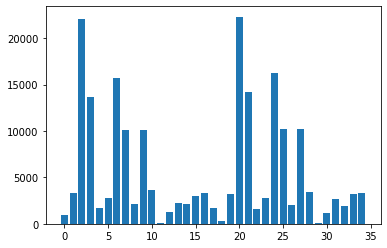

In [24]:
plt.bar(np.arange(len(X.columns)),clf4.feature_importances_)

In [25]:
for i,j in enumerate(X.columns):
    print(i,j)

0 best_of
1 first_1stIn
2 first_1stWon
3 first_2ndWon
4 first_SvGms
5 first_ace
6 first_bpFaced
7 first_bpSaved
8 first_df
9 first_svpt
10 first_age
11 first_hand
12 first_ht
13 first_id
14 first_ioc
15 first_rank
16 first_rank_points
17 tourney_id
18 tourney_level
19 second_1stIn
20 second_1stWon
21 second_2ndWon
22 second_SvGms
23 second_ace
24 second_bpFaced
25 second_bpSaved
26 second_df
27 second_svpt
28 second_age
29 second_hand
30 second_ht
31 second_id
32 second_ioc
33 second_rank
34 second_rank_points


In [26]:
clf4.booster_.save_model('lgbr_model.txt')